Loaded data/sales_data.csv as sales: 20 rows, 7 columns
Selected 4 columns from sales
Filtered products: 12 rows match condition
Grouped by ['category']: 3 groups

Descriptive Statistics for expensive_products:
            price  quantity
count   12.000000   12.0000
mean   354.990000    1.5000
std    314.136623    0.6742
min     79.990000    1.0000
25%     99.990000    1.0000
50%    224.990000    1.0000
75%    599.990000    2.0000
max    899.990000    3.0000

Dataset Info for category_summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      3 non-null      object 
 1   quantity_sum  3 non-null      int64  
 2   price_mean    3 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 204.0+ bytes


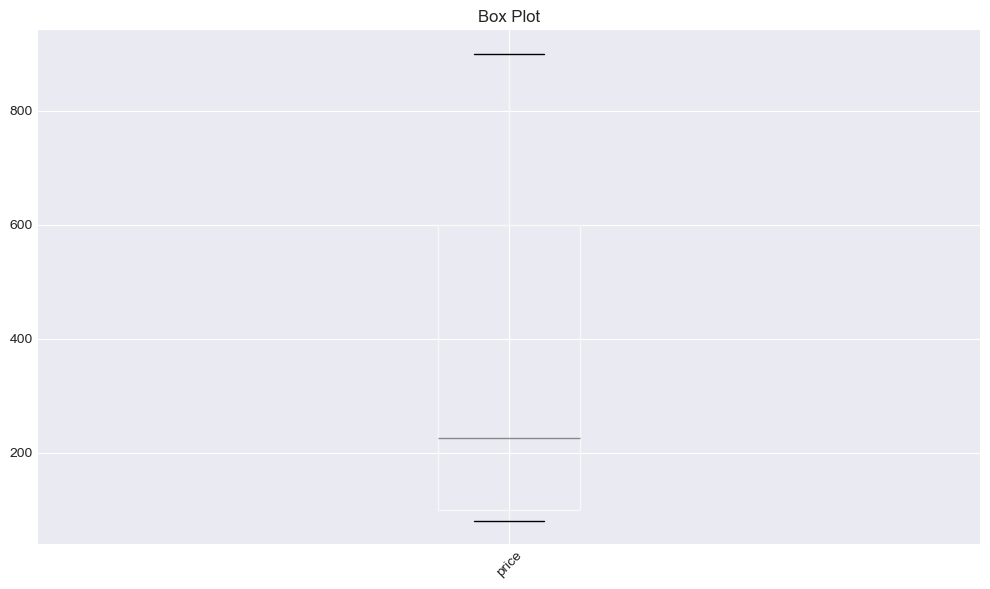

In [2]:
# Basic Noeta Demo Script
# This demonstrates core data manipulation features using Unified Syntax v2.0

# Load data (unified syntax with auto-detection)
load "data/sales_data.csv" as sales

# Basic operations
select sales {product_id, category, price, quantity} as products

# Filter with WHERE clause (unified syntax)
filter products where price > 50 as expensive_products

# Aggregation (unified syntax: by without colon, compute instead of agg)
groupby sales by {category} compute {sum: quantity, avg: price} as category_summary

# Analysis
describe expensive_products
info category_summary

# Visualization
boxplot expensive_products columns {price}

Loaded data/sales_data.csv as sales: 20 rows, 7 columns
Dropped NA values: 0 rows removed

Descriptive Statistics for clean_sales:
            price   quantity   discount
count   20.000000  20.000000  20.000000
mean   224.490000   2.400000   7.500000
std    289.995009   1.535544   6.786209
min     14.990000   1.000000   0.000000
25%     29.990000   1.000000   0.000000
50%     89.990000   2.000000   5.000000
75%    299.990000   3.000000  11.250000
max    899.990000   6.000000  20.000000
Sampled 10 rows from clean_sales
Filtered sample_data: 6 rows match condition
Grouped by ['category']: 2 groups

Dataset Info for category_summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   category          2 non-null      object 
 1   price_sum         2 non-null      float64
 2   quantity_mean     2 non-null      float64
 3   product_id_count  2 n

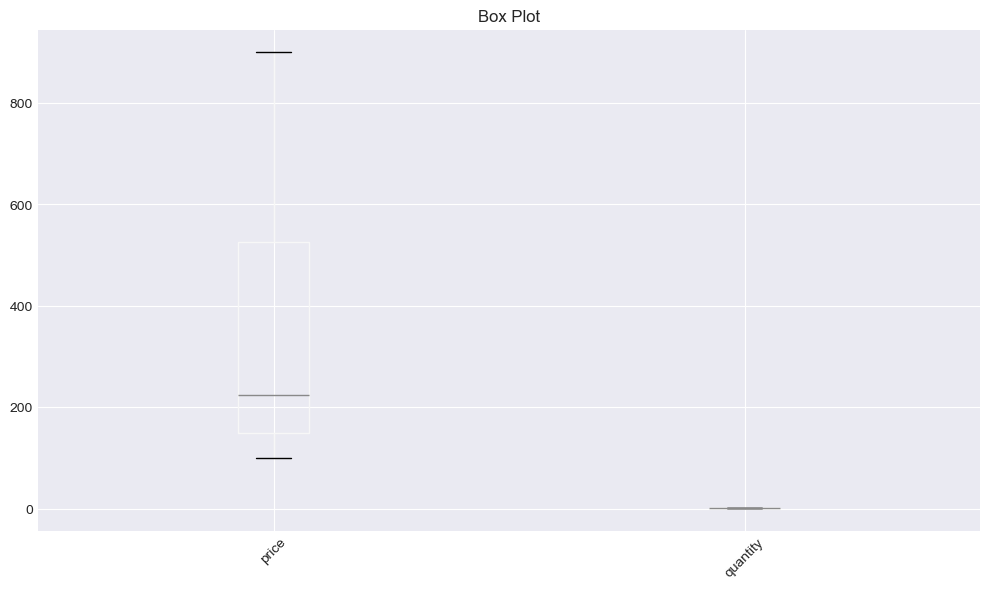

In [4]:
# Advanced Noeta Demo Script
# This demonstrates more complex analysis features using Unified Syntax v2.0

# Load and prepare data (unified syntax with auto-detection)
load "data/sales_data.csv" as sales

# Data cleaning
dropna sales as clean_sales

# Basic statistics before processing
describe clean_sales

# Sampling and filtering (unified syntax: with for parameters, where for conditions)
sample clean_sales with n=10 random as sample_data
filter sample_data where price > 50 as high_value_sales

# Aggregation by category (unified syntax: by without colon, compute instead of agg)
groupby high_value_sales by {category} compute {sum: price, mean: quantity, count: product_id} as category_summary

# Display aggregation results
info category_summary
describe category_summary

# Sorting the high value sales (unified syntax: by without colon)
sort high_value_sales by price desc as sorted_sales

# Display top results
head sorted_sales with n=5 as top_sales
summary top_sales

# Statistical analysis
describe top_sales

# Visualization
boxplot high_value_sales columns {price, quantity}

# Export results (unified syntax with auto-detection)
save category_summary to "output/category_summary.csv"
save top_sales to "output/top_sales.csv"

In [6]:
# Noeta Unified Syntax v2.0 - Filter Consolidation Demo
# This demonstrates the new unified filter syntax that replaces all branch operations

# Load sample data
load csv "data/sales_data.csv" as sales

# ============================================================================
# SIMPLE COMPARISONS (replaces basic filter)
# ============================================================================

filter sales where price > 100 as expensive_items
filter sales where quantity >= 10 as bulk_orders
filter sales where category == "Electronics" as electronics

# ============================================================================
# BETWEEN (replaces filter_between)
# ============================================================================

# Old syntax: filter_between sales with column="price" min=50 max=200 as mid_range
# New syntax:
filter sales where price between 50 and 200 as mid_range_prices

# ============================================================================
# IN (replaces filter_isin)
# ============================================================================

# Old syntax: filter_isin sales with column="category" values=["A", "B", "C"] as selected
# New syntax:
filter sales where category in ["Electronics", "Computers", "Phones"] as tech_products

# ============================================================================
# STRING MATCHING (replaces filter_contains, filter_startswith, filter_endswith)
# ============================================================================

# Old syntax: filter_contains sales with column="product" pattern="laptop" as laptops
# New syntax:
filter sales where product contains "laptop" as laptops

# Old syntax: filter_startswith sales with column="product_id" pattern="PRO" as pro_products
# New syntax:
filter sales where product_id starts_with "PRO" as pro_products

# Old syntax: filter_endswith sales with column="email" pattern="@gmail.com" as gmail_customers
# New syntax:
filter sales where customer_email ends_with "@gmail.com" as gmail_customers

# ============================================================================
# REGEX MATCHING (replaces filter_regex)
# ============================================================================

# Old syntax: filter_regex sales with column="phone" pattern="\\d{3}-\\d{3}-\\d{4}" as valid_phones
# New syntax:
filter sales where phone matches "\\d{3}-\\d{3}-\\d{4}" as valid_phones

# ============================================================================
# NULL CHECKS (replaces filter_null, filter_notnull)
# ============================================================================

# Old syntax: filter_null sales with column="discount" as no_discount
# New syntax:
filter sales where discount is null as no_discount_orders

# Old syntax: filter_notnull sales with column="discount" as with_discount
# New syntax:
filter sales where discount is not null as discounted_orders

# ============================================================================
# COMPLEX CONDITIONS (NEW - supports and/or/not/parentheses)
# ============================================================================

# Multiple conditions with AND
filter sales where price > 100 and quantity < 10 as high_price_low_qty

# Multiple conditions with OR
filter sales where category == "Electronics" or category == "Computers" as tech_items

# Complex nested conditions
filter sales where (price > 100 and quantity < 10) or (discount is not null) as special_cases

# Negation
filter sales where not (category == "Books") as non_books

# Very complex condition
filter sales where (price between 50 and 200) and (category in ["Electronics", "Computers"]) and quantity >= 5 as qualified_orders

# Display results
describe qualified_orders


KeyError: 'product'